In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df_hist = pl.read_csv('../DATASETS/reportes_agua_hist.csv')

# Exploracion de los datos

In [3]:
df_hist.head()

folio,tipo_de_falla,quien_atiende,latitud,longitud,codigo_postal,fecha,colonia_registro_sacmex,colonia_datos_abiertos,alcaldia
str,str,str,f64,f64,str,str,str,str,str
"""20210405-0030""","""Falta de agua""","""Poniente""",19.378935,-99.191926,"""1420""","""2021-04-05""","""Alfonso XIII""","""SANTA MARIA NONOALCO""","""ALVARO OBREGON"""
"""20210428-0107""","""Falta de agua""","""Poniente""",19.342617,-99.218876,"""1780""","""2021-04-28""","""Olivar de los Padres""","""LOMAS DE LOS ANGELES TETELPAN""","""ALVARO OBREGON"""
"""20210428-0184""","""Falta de agua""","""Poniente""",19.342893,-99.218,"""NA""","""2021-04-28""","""Lomas de los Ángeles Tetelpan""","""LOMAS DE LOS ANGELES TETELPAN""","""ALVARO OBREGON"""
"""20210429-0075""","""Falta de agua""","""Poniente""",19.342617,-99.218876,"""1780""","""2021-04-29""","""Olivar de los Padres""","""LOMAS DE LOS ANGELES TETELPAN""","""ALVARO OBREGON"""
"""20210429-0157""","""Falta de agua""","""Poniente""",19.342831,-99.217981,"""1780""","""2021-04-29""","""Lomas de los Ángeles Tetelpan""","""LOMAS DE LOS ANGELES TETELPAN""","""ALVARO OBREGON"""


In [4]:
df_hist.tail()

folio,tipo_de_falla,quien_atiende,latitud,longitud,codigo_postal,fecha,colonia_registro_sacmex,colonia_datos_abiertos,alcaldia
str,str,str,f64,f64,str,str,str,str,str
"""20200219-0200""","""Falta de agua""","""Poniente""",34.420831,-119.69819,"""0""","""2020-02-19""","""California""","""NA""","""NA"""
"""20200305-0080""","""Falta de agua""","""Sur San Pedro Mártir""",0.0,0.0,"""0""","""2020-03-05""","""NA""","""NA""","""NA"""
"""20200317-0141""","""Falta de agua""","""Chalma""",19.528133,-99.115958,"""54187""","""2020-03-17""","""Industrial la Presa""","""NA""","""NA"""
"""20200606-0081""","""Falta de agua""","""Oriente""",20.200746,-100.90186,"""0""","""2020-06-06""","""Mexico""","""NA""","""NA"""
"""20200806-0099""","""Falta de agua""","""Poniente""",0.0,0.0,"""0""","""2020-08-06""","""NA""","""NA""","""NA"""


In [5]:
df_hist.shape

(254730, 10)

In [6]:
df_hist.columns

['folio',
 'tipo_de_falla',
 'quien_atiende',
 'latitud',
 'longitud',
 'codigo_postal',
 'fecha',
 'colonia_registro_sacmex',
 'colonia_datos_abiertos',
 'alcaldia']

In [7]:
df_hist.dtypes

[String,
 String,
 String,
 Float64,
 Float64,
 String,
 String,
 String,
 String,
 String]

In [8]:
pl.DataFrame({'columna': df_hist.columns, 'tipo data': df_hist.dtypes})

columna,tipo data
str,object
"""folio""",String
"""tipo_de_falla""",String
"""quien_atiende""",String
"""latitud""",Float64
"""longitud""",Float64
"""codigo_postal""",String
"""fecha""",String
"""colonia_registro_sacmex""",String
"""colonia_datos_abiertos""",String


In [9]:
# Parse/Cast de los datos al tipo de dato correcto
df_hist_cast = df_hist.select(
    pl.col("folio").cast(pl.Utf8),
    pl.col("tipo_de_falla").cast(pl.Utf8),
    pl.col("quien_atiende").cast(pl.Utf8),
    pl.col("latitud").cast(pl.Float64),
    pl.col("longitud").cast(pl.Float64),
    pl.col("codigo_postal").cast(pl.Int16, strict=False),
    pl.col("fecha").str.to_date(),
    pl.col("colonia_registro_sacmex").cast(pl.Utf8),
    pl.col("colonia_datos_abiertos").cast(pl.Utf8),
    pl.col("alcaldia").cast(pl.Utf8)
)

In [10]:
df_hist_cast.null_count()

folio,tipo_de_falla,quien_atiende,latitud,longitud,codigo_postal,fecha,colonia_registro_sacmex,colonia_datos_abiertos,alcaldia
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,16494,0,0,0,0


In [11]:
total_records = df_hist_cast.shape[0]
df_nulos = df_hist_cast.select(
    (100 - (pl.col("folio").null_count()/total_records * 100).round(2)).alias('folio'),
    (100 - (pl.col("tipo_de_falla").null_count()/total_records * 100).round(2)).alias('tipo_de_falla'),
    (100 - (pl.col("quien_atiende").null_count()/total_records * 100).round(2)).alias('quien_atiende'),
    (100 - (pl.col("latitud").null_count()/total_records * 100).round(2)).alias('latitud'),
    (100 - (pl.col("longitud").null_count()/total_records * 100).round(2)).alias('longitud'),
    (100 - (pl.col('codigo_postal').null_count()/total_records * 100).round(2)).alias('codigo_postal'),
    (100 - (pl.col("fecha").null_count()/total_records * 100).round(2)).alias('fecha'),
    (100 - (pl.col("colonia_registro_sacmex").null_count()/total_records * 100).round(2)).alias('colonia_registro_sacmex'),
    (100 - (pl.col("colonia_datos_abiertos").null_count()/total_records * 100).round(2)).alias('colonia_datos_abiertos'),
    (100 - (pl.col("alcaldia").null_count()/total_records * 100).round(2)).alias('alcaldia')
)

In [12]:
data_nulls = pl.DataFrame({'columns': df_nulos.columns, 'values': df_nulos.to_numpy()[0]})
data_nulls

columns,values
str,f64
"""folio""",100.0
"""tipo_de_falla""",100.0
"""quien_atiende""",100.0
"""latitud""",100.0
"""longitud""",100.0
"""codigo_postal""",93.52
"""fecha""",100.0
"""colonia_registro_sacmex""",100.0
"""colonia_datos_abiertos""",100.0


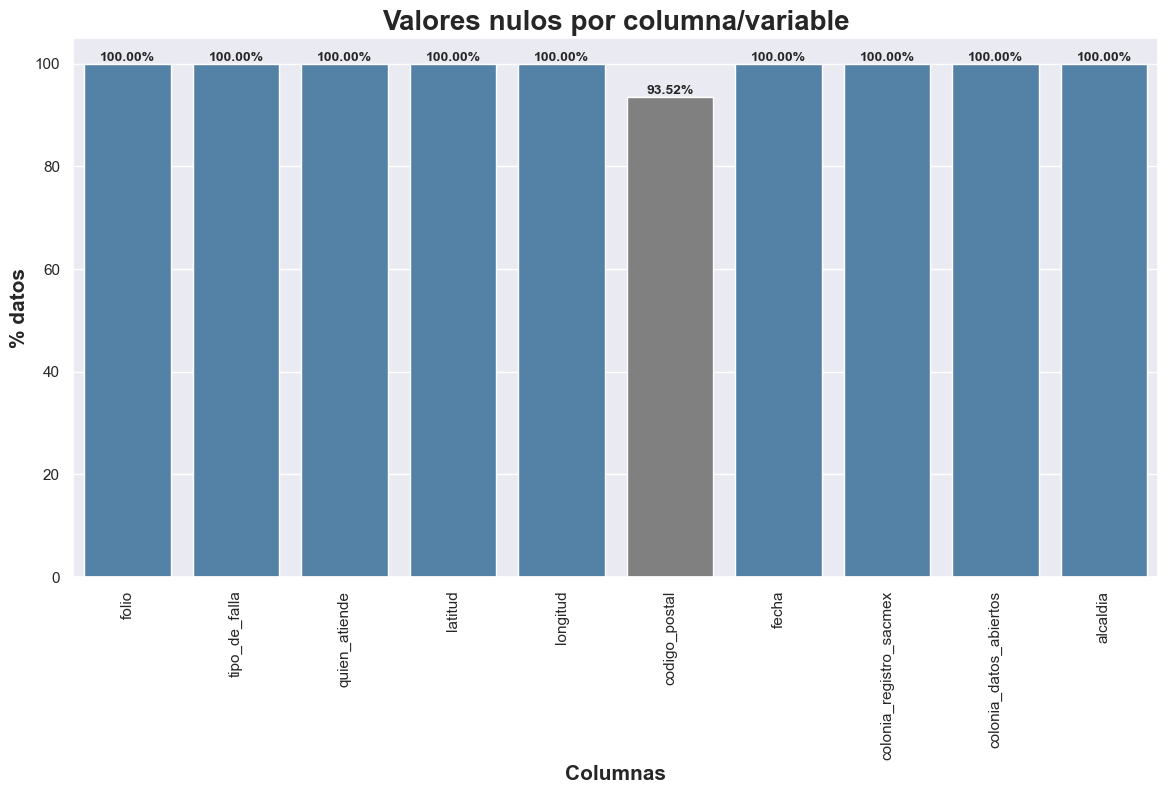

In [13]:
fig, ax = plt.subplots(figsize=(14, 7))
barplot = sns.barplot(data=data_nulls, x='columns', y='values', hue='values', ax=ax, legend=False, palette=['gray', 'steelblue'])
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Columnas', fontsize=15, fontweight="bold")
ax.set_ylabel('% datos', fontsize=15, fontweight="bold")
ax.set_title('Valores nulos por columna/variable', fontsize=20, fontweight="bold")

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', fontsize=10, fontweight="bold")

plt.show()

> Podemos elegir eliminar esos registros o llenarlos con un valor default. Ya que nos interesa más los otros datos.

In [14]:
# tipos de falla
df_hist_cast['tipo_de_falla'].unique()

tipo_de_falla
str
"""NA"""
"""Fuga"""
"""Falta de agua"""
"""Mala calidad"""


In [15]:
df_hist_cast['fecha'].dt.year().value_counts()

fecha,count
i32,u32
2020,33559
2019,69378
2021,83994
2018,67799


In [16]:
df_hist_cast.select(
    pl.col('fecha').dt.year(),
    pl.col('tipo_de_falla')
).filter(
    pl.col('tipo_de_falla') == 'Fuga'
).group_by('fecha').agg(pl.col('tipo_de_falla').count())

fecha,tipo_de_falla
i32,u32
2021,33018


In [17]:
df_hist_cast['tipo_de_falla'].value_counts()

tipo_de_falla,count
str,u32
"""NA""",5
"""Fuga""",33018
"""Mala calidad""",843
"""Falta de agua""",220864


In [18]:
# Quitamos los que son NA
df_hist2 = df_hist_cast.filter(pl.col('tipo_de_falla') != 'NA')
df_hist2['tipo_de_falla'].value_counts()

tipo_de_falla,count
str,u32
"""Fuga""",33018
"""Falta de agua""",220864
"""Mala calidad""",843


In [19]:
# Solo los casos de Fugas
df_fugas_hist = df_hist2.filter(pl.col('tipo_de_falla') == 'Fuga')
df_fugas_hist.head()

folio,tipo_de_falla,quien_atiende,latitud,longitud,codigo_postal,fecha,colonia_registro_sacmex,colonia_datos_abiertos,alcaldia
str,str,str,f64,f64,i16,date,str,str,str
"""20210107-0129""","""Fuga""","""Tláhuac""",19.310192,-99.047786,null,2021-01-07,"""Ciudad de México""","""LAS ARBOLEDAS""","""TLAHUAC"""
"""20210101-0008""","""Fuga""","""Iztapalapa""",19.370615,-99.030413,9239,2021-01-01,"""Ciudad de México""","""EJERCITO DE ORIENTE (U HAB) I""","""IZTAPALAPA"""
"""20210101-0020""","""Fuga""","""Álvaro Obregón""",19.375857,-99.233819,null,2021-01-01,"""Ciudad de México""","""2DA JALALPA TEPITO (AMPL)""","""ALVARO OBREGON"""
"""20210101-0048""","""Fuga""","""Álvaro Obregón""",19.388433,-99.20185,1150,2021-01-01,"""Colonia Cristo Rey""","""CRISTO REY""","""ALVARO OBREGON"""
"""20210101-0049""","""Fuga""","""Azcapotzalco""",19.473759,-99.176527,2060,2021-01-01,"""Un Hogar Para Cada Trabajador""","""UN HOGAR PARA CADA TRABAJADOR""","""AZCAPOTZALCO"""


In [20]:
df_fugas_hist['fecha'].dt.year().unique()

fecha
i32
2021


In [21]:
# Fugas por año y delegacion
df_fugas_hist.group_by([pl.col('fecha').dt.year(), 'alcaldia']) \
    .agg(pl.col('tipo_de_falla')
        .count())

fecha,alcaldia,tipo_de_falla
i32,str,u32
2021,"""XOCHIMILCO""",1839
2021,"""CUAJIMALPA DE MORELOS""",531
2021,"""IZTACALCO""",655
2021,"""MILPA ALTA""",210
2021,"""ALVARO OBREGON""",4718
…,…,…
2021,"""BENITO JUAREZ""",1193
2021,"""CUAUHTEMOC""",814
2021,"""VENUSTIANO CARRANZA""",664


In [22]:
# Fugas por año y quien atiende
fugas_por_atiende = df_fugas_hist \
    .group_by([pl.col('fecha').dt.year(), 'quien_atiende']) \
    .agg(total_fugas=(pl.col('tipo_de_falla').count())) \
    .sort(by='total_fugas', descending=True)
fugas_por_atiende

fecha,quien_atiende,total_fugas
i32,str,u32
2021,"""Coyoacán""",4224
2021,"""Álvaro Obregón""",3835
2021,"""Gustavo A. Madero""",3078
2021,"""Tlalpan""",2698
2021,"""Iztapalapa""",2258
…,…,…
2021,"""Oriente Santa Catarina""",351
2021,"""NA""",51
2021,"""Cuajimalpa de Morelos""",7


In [23]:
# Fugas por año y delegacion, ordenado de manera descendente
fugas_por_alcaldia = df_fugas_hist \
    .group_by([pl.col('fecha').dt.year(), 'alcaldia']) \
    .agg(total_fugas=(pl.col('tipo_de_falla').count())) \
    .sort(by='total_fugas', descending=True)
fugas_por_atiende

fecha,quien_atiende,total_fugas
i32,str,u32
2021,"""Coyoacán""",4224
2021,"""Álvaro Obregón""",3835
2021,"""Gustavo A. Madero""",3078
2021,"""Tlalpan""",2698
2021,"""Iztapalapa""",2258
…,…,…
2021,"""Oriente Santa Catarina""",351
2021,"""NA""",51
2021,"""Cuajimalpa de Morelos""",7


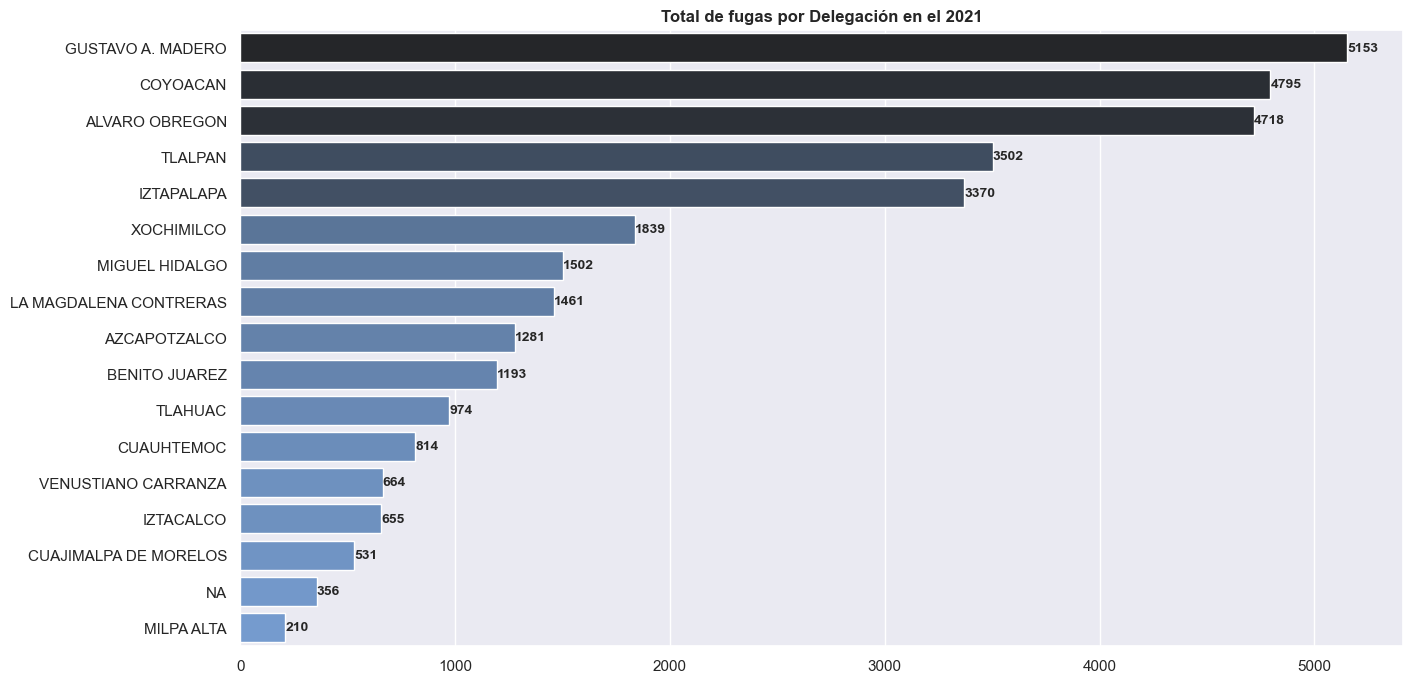

In [24]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.barplot(data=fugas_por_alcaldia.to_pandas(), 
                y='alcaldia', x='total_fugas', 
                orient='h', 
                hue='total_fugas', 
                palette=sns.dark_palette("#69d", reverse=True, as_cmap=True),
                ax=ax, 
                legend=False)

ax.set_xlabel('', fontsize=15, fontweight="bold")
ax.set_ylabel('', fontsize=15, fontweight="bold")
ax.set_title('Total de fugas por Delegación en el 2021', fontsize=12, fontweight="bold")

for i in ax.containers:
    ax.bar_label(i, fontsize=10, fontweight="bold")

plt.show()

In [25]:
# Exportando los datos a formato Parquet
df_fugas_hist.write_parquet('../DATASETS/fugas_2021.parquet', compression='gzip')